## Terminologie 

**Nombres pseudo-aléatoires**: consiste en une suite de nombre ayant certaines propriétés mathématiques. Après une certaine période, on revient au debut de la suite. Le but est que la période soit la plus longue possible et la répartition la plus uniforme possible.

**Nombres vraiment aléatoires**: Ils sont générés via un facteur externe tel que les mouvements de souris, la pression atmosphérique,...

## Génération de nombre pseudo aléatoires 
### Distribution uniforme (entre 0 et 1)

#### Modulo 

$$
    i_{n+1} = (a i_n + c) \% M
$$

**keypoint** : la distribution devient plus uniforme si $a$ et $M$ sont grands. $a$ doit être assez différent de $M$ sinon on génère tout le temps le même nombre.

(array([4., 1., 0., 5., 6., 0., 2., 2., 1., 2., 2., 1., 3., 2., 6., 5., 9.,
        4., 2., 8., 3., 4., 1., 6., 3., 5., 4., 4., 2., 3.]),
 array([7.11367779e-08, 3.29879096e-02, 6.59757481e-02, 9.89635866e-02,
        1.31951425e-01, 1.64939264e-01, 1.97927102e-01, 2.30914941e-01,
        2.63902779e-01, 2.96890618e-01, 3.29878456e-01, 3.62866295e-01,
        3.95854133e-01, 4.28841972e-01, 4.61829810e-01, 4.94817649e-01,
        5.27805487e-01, 5.60793326e-01, 5.93781164e-01, 6.26769003e-01,
        6.59756841e-01, 6.92744680e-01, 7.25732518e-01, 7.58720357e-01,
        7.91708195e-01, 8.24696034e-01, 8.57683872e-01, 8.90671711e-01,
        9.23659549e-01, 9.56647388e-01, 9.89635226e-01]),
 <a list of 30 Patch objects>)

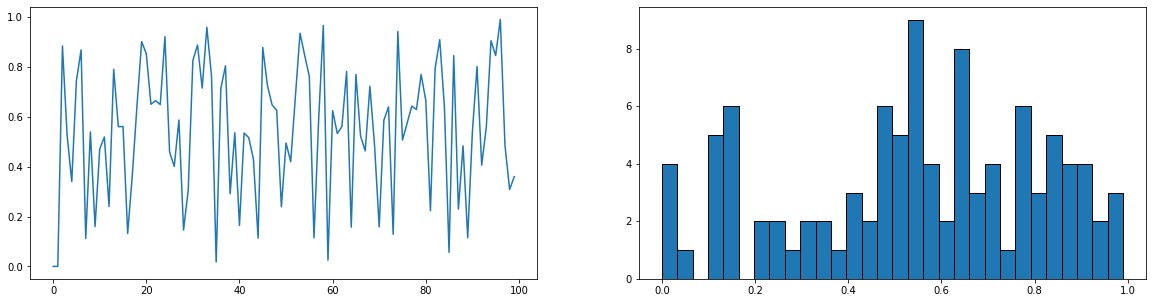

In [38]:
import matplotlib.pyplot as plt

def random_modulo(n, seed = 1, a = 7, c = 0, M = 17):
    i_k = seed
    for k in range(n):
        i_k = ((a*i_k) + c) % M
        yield i_k/M
        
random_list = list(random_modulo(n = 100, seed=1, a=3523, c=50, M=2.6794**25))

plt.rcParams["figure.figsize"] = (20, 5)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(range(100), random_list)
ax2.hist(random_list, bins=30, ec ="black")

### Distribution arbitraire 

**But**: transformer une distribution uniforme en une distribution arbitraire

#### Méthode de rejet :

On prend une fonction $f$ qui sera la forme de notre distribution (ex: $e^{-x^2/2}$)

On tire chaque fois 2 nombres :

- un nombre $x_0$ qui appartient au domaine de $f$. 

/!\ Si le domaine est infini, on doit faire un changement de variable pour passer en domaine fini.

- un nombre $y$ compris entre $0$ et $M$ (max de $f$).

Si $y \geq f(x_0)$, on le rejette. Sinon on le garde.

**Efficacité**: $E = \frac{\text{nombre de points gardés}}{\text{nombre de points tirés}} = \frac{\int_a^b f(x)dx}{M(b-a)}$

Par conséquent, plus la forme de la fonction est piquée, moins cette méthode est efficace.

efficacité: 66.827%


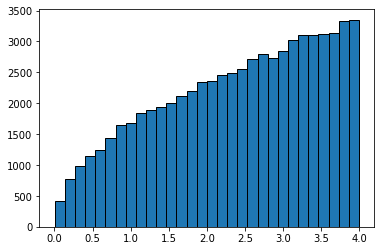

In [38]:
import numpy as np
import random
import math


def gaussian(x) :
    return math.exp(-(x**2) / 2)

"""
f : fonction
n : nombre de nombres à générer
a : borne inférieure
b : borne supérieure
"""
def rejet(f, n, a, b, M):
    numbers = []
    accepted = 0
    for i in range(n):
        x = random.uniform(a, b)
        y = random.uniform(0, M)
    
        if (y >= f(x)):
            continue
        
        numbers.append(x)
        accepted += 1
        
    return numbers, accepted/n

numbers, eff = rejet(math.sqrt, n = 100000, a=0, b=4, M=2)
plt.hist(numbers, bins = 30, ec = "black")
print(f"efficacité: {eff * 100}%")

#### Transformée inverse 

On trouve une transformation $T$ qui transforme un échantillon $U$ uniforme entre 0 et 1 en un échantillon $X$ distribué selon $f(x)$ entre $a$ et $b$.

On utilise la fonction de répartition : 

$$F_X(x) = \int_a^x f(x')dx' = P(X < x)$$

$$ T(x) = F_X^{-1}(x)$$

**exemple**:

$f(x) = \frac{1}{\lambda}e^{-\frac{x}{\lambda}} \in [0, + \infty]$

$$F_X(x) = \int_0^x \frac{1}{\lambda}e^{-\frac{x'}{\lambda}} dx' = \left[-e^{-\frac{x'}{\lambda}}\right]_0^x = 1 - e^{-\frac{x}{\lambda}}$$

$$ T(u) = F_X^{-1}(x) = - \lambda ln(1-u)$$

**keypoint**: $u$ est un nombre aléatoire $\in [0, 1]$

(array([3.3348e+04, 2.2123e+04, 1.4813e+04, 9.8640e+03, 6.6220e+03,
        4.4160e+03, 2.9040e+03, 1.9490e+03, 1.3570e+03, 8.9900e+02,
        5.7000e+02, 3.7100e+02, 2.4700e+02, 1.6000e+02, 1.2300e+02,
        7.7000e+01, 5.3000e+01, 3.1000e+01, 2.6000e+01, 1.2000e+01,
        9.0000e+00, 6.0000e+00, 7.0000e+00, 3.0000e+00, 3.0000e+00,
        2.0000e+00, 3.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([2.17558137e-05, 4.04864120e-01, 8.09706485e-01, 1.21454885e+00,
        1.61939121e+00, 2.02423358e+00, 2.42907594e+00, 2.83391831e+00,
        3.23876067e+00, 3.64360304e+00, 4.04844540e+00, 4.45328776e+00,
        4.85813013e+00, 5.26297249e+00, 5.66781486e+00, 6.07265722e+00,
        6.47749959e+00, 6.88234195e+00, 7.28718432e+00, 7.69202668e+00,
        8.09686904e+00, 8.50171141e+00, 8.90655377e+00, 9.31139614e+00,
        9.71623850e+00, 1.01210809e+01, 1.05259232e+01, 1.09307656e+01,
        1.13356080e+01, 1.17404503e+01, 1.21452927e+01]),
 <a list of 30 Patch objects

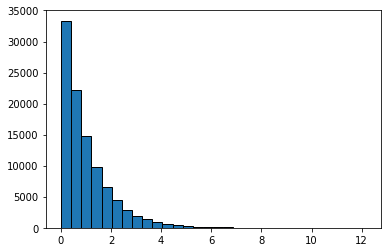

In [48]:
import random
from math import log

def t_inv(u, lamb):
    return - lamb * log(1-u)

def rand(n):
    numbers = []
    for i in range(n):
        y = t_inv(u = random.random(), lamb = 1)
        numbers.append(y)
    return numbers

plt.hist(rand(100000), bins=30, ec="black")

#### Méthode combinée

Combine la méthode du rejet et de la transformée inverse.
On utilise la méthode du rejet avec une distribution arbitraire $g(x)$

- On multiplie $g(x)$ par $M$ tel que $f(x) < Mg(x)$ sur l'intervalle.
- On génère $x,y$ avec _$x$ selon $g$_ et _$y$ uniforme_.
- On garde $x$ si $y < \frac{f(x)}{Mg(x)}$

**exemple**:

$$f(x) = \frac{h(x)}{x} \quad \text{avec $h(x) \leq 1$}$$

Donc $$f(x) \leq \frac{1}{x} = g(x)$$

Prenons l'intervalle $[1, 20]$ et la fonction : $$f(x) = \frac{sin^2(x)}{x}$$

On a donc que :

$$ sin^2(x) \leq 1$$

On calcule la transformation T :

$$ G(x) = \int_1^x g(x')dx' = ln(x) \implies G^{-1}(x) = T(u) = e^u$$

Maintenant, on veut que $G(x_{max}) = G(20) = 1$ donc on doit multiplier $g(x)$ par un facteur $\lambda$ et donc $\lambda = \frac{1}{ln(20)}$

On a donc : 

$$ T(u) = e^{uln(20)} = 20^u$$

Ensuite, on peut prendre $M = \frac{1}{\lambda}$ :

$$ f(x) \leq \frac{1}{x} = Mg(x)$$


In [ ]:
import math
import random
import matplotlib.pyplot as plt

deg g(a, b):
    pass
    #return math.exp(random.uniform(a, b))